# Soccer Mining League
## Predict result one league and one season

#### Data Mining PESC/COPPE/UFRJ
#### Required: Python 3.5, Numpy, Scikit-Learn, Matplotlib

In [1]:
import numpy as np

#Sklearn -- preprocessing 
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#Plots
%matplotlib inline

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.cross_validation import cross_val_score

# Soccer Mining League Functions
from functions import *

## Reading dataset

#### Reading from file

In [2]:
trainTest = np.loadtxt("../dataset/formated_files/matchs_teams_players_germany_league_2015_2016_formated.csv",delimiter=",")

#### Recover output

In [3]:
outputs = trainTest[:,907]
outputsR = trainTest[:,[908,909]]


## Preprocessing

#### Plot PCA Expectrum for Tatics  (One Team)

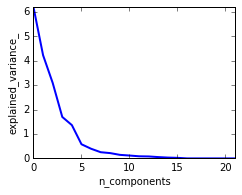

In [4]:
homeTatics = trainTest[:,[3,4,5,6,7,8,9,10,11,12,13,25,26,27,28,29,30,31,32,33,34,35]]
plotPCASpectrum(homeTatics)

#### Plot PCA Expectrum for team rating (One Team)

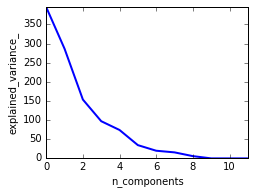

In [5]:
homeRateTeam = trainTest[:,[47,48,49,50,51,52,53,54,55,56,57,58]]
plotPCASpectrum(homeRateTeam)

#### Plot PCA Expectrum for one Player

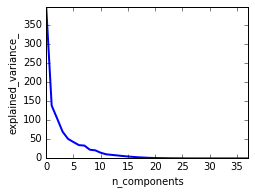

In [6]:
homeRateTeam = trainTest[:,71:109]
plotPCASpectrum(homeRateTeam)

#### Reducing Dimensionality for Tatics

In [7]:
homeTatics = trainTest[:,[3,4,5,6,7,8,9,10,11,12,13,25,26,27,28,29,30,31,32,33,34,35]]
awayTatics = trainTest[:,[14,15,16,17,18,19,20,21,22,23,24,36,37,38,39,40,41,42,43,44,45,46]]

pca = decomposition.PCA(n_components=5)
homeTaticspreprocessed = pca.fit_transform(homeTatics)

pca = decomposition.PCA(n_components=5)
awayTaticspreprocessed = pca.fit_transform(awayTatics)

#### Reducing Dimensionality for team ratings

In [8]:
homeRateTeam = trainTest[:,[47,48,49,50,51,52,53,54,55,56,57,58]]
awayRateTeam = trainTest[:,[59,60,61,62,63,64,65,66,67,68,69,70]]

pca = decomposition.PCA(n_components=6)
homeRateTeamPreprocessed = pca.fit_transform(homeRateTeam)

pca = decomposition.PCA(n_components=6)
awayRateTeampreprocessed = pca.fit_transform(awayRateTeam)

#### Reducing Dimensionality for players

In [9]:
xTatics = trainTest[:,[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46]]

playersRD = [decomposition.PCA(n_components=9).fit_transform(np.concatenate((trainTest[:,range(71+(pos*38),71+((pos+1)*38))],xTatics[:,[pos,pos+22]]),axis=1)) for pos in range(22)]




#### Maximize sparse teams

In [10]:
enc = preprocessing.OneHotEncoder()
enc.fit(trainTest[:,[0]])
teamsH = enc.transform(trainTest[:,[0]]) 
teamsA = enc.transform(trainTest[:,[1]]) 
teams = (teamsH + teamsA).toarray()

#### Concatenate inputs

In [11]:
date = trainTest[:,[2]]
inputs = np.concatenate((homeRateTeamPreprocessed,awayRateTeampreprocessed,teams), axis=1)

for playerRD in playersRD:
    inputs = np.concatenate((inputs,playerRD), axis=1)



#### Scaling inputs

In [12]:
inputs = StandardScaler().fit_transform(inputs)

## Classification 

#### Using KFold with Naive Bayes

In [13]:
resultSVM = KFoldNB(inputs,outputs)

gnb = GaussianNB()
np.mean(cross_val_score(gnb, inputs, outputs, scoring='accuracy', cv=10))

Naive Bayes: = Score:4.56e-01[+/- 7.53e-02]


0.4830241935483871

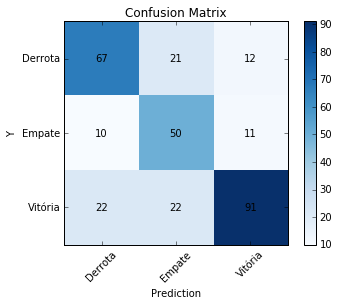

In [14]:
gnb.fit(inputs, outputs)

y_predict = gnb.predict(inputs)
plotConfusionMatrix(outputs, y_predict)

#### Using KFold with SVM

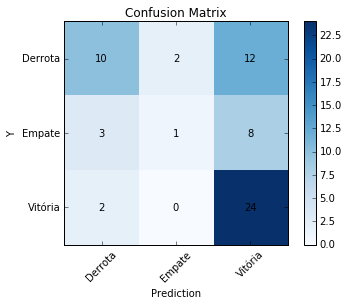

In [15]:
clf = svm.SVC()
np.mean(cross_val_score(clf,inputs,outputs,cv=10))
holdoutPlotConfusionMatrix(clf,inputs,outputs)

#### Using KFold with Logistic Regression

In [16]:
clf = LogisticRegression(penalty='l1')
np.mean(cross_val_score(clf,inputs,outputs,cv=10))

0.47344086021505383

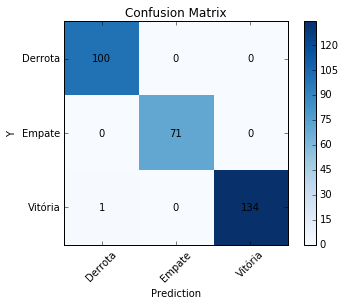

In [17]:
clf.fit(inputs, outputs)
y_predict = clf.predict(inputs)
plotConfusionMatrix(outputs, y_predict)

#### Using KFold with KNeighborsClassifier

In [18]:
clf = KNeighborsClassifier(n_neighbors=15)
np.mean(cross_val_score(clf,inputs,outputs,cv=10))

0.51365591397849464

#### Using SVM - Regression for predict number of goals before predict winning team

In [19]:
clf = svm.SVR()
KFoldRC(clf,inputs,outputsR)

[ 1.61588668  1.23452593  1.13648632  1.74902055  1.97980867]
[ 0.56067225  1.1302282   1.68550027  0.98995989  0.91070114]
[ 1.40529551  0.86865446  1.02003799  0.87724993  1.45406828]
[ 0.79077396  1.29603513  1.20041446  1.0459818   1.17069376]
[ 2.46271924  1.42300384  2.07880341  1.59287493  1.10789207]
[ 1.35931012  1.36449783  1.05064277  1.41131213  1.38901378]
[ 0.92576889  0.85397606  1.26302536  1.48261251  1.93239838]
[ 1.3806894   1.38651651  1.27605424  0.54776759  0.70004553]
[ 1.15650288  1.4762169   1.0957417   0.71908818  0.84031279]
[ 1.26101181  1.25958986  1.84360057  1.5670775   1.14280011]
[ 2.03021284  2.22622902  0.98583889  1.34879716  0.82444828]
[ 0.49558298  1.36047368  1.3728258   0.98441142  1.7701785 ]
[ 1.05783658  1.73160884  1.12013805  1.6240453   0.91480329]
[ 1.28478967  0.91657814  1.28972835  0.9261649   1.50138009]
[ 1.02030338  1.48339132  0.90754535  1.74837448  2.29077647]
[ 1.28080641  0.27016348  1.07307027  1.18896633  0.64909919]
[ 1.8684

0.56354838709677424